# Open Weather Forecast

This notebook displays the variation of temperature and humidity from a week data of a particular location which is set to 'bangalore' as a example.

Weather data is being fetched from the openweathermap free api whose response is processed to days, temperature and humidity data and from it we finally plot a line chart representing the variation.

In [60]:
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd

class OpenWeatherForecast():
    def __init__(self, city: str) -> None:
        self.api_key = "ba24c6018ddd72041749018d0c1b1ef8"
        self.city = city
        self.base_url = "http://api.openweathermap.org/data/2.5/forecast"
    
    def _gather_data(self) -> dict:
        route_to_city_weather = "?q={}&appid={}&units=metric".format(self.city,self.api_key)
        url = self.base_url + route_to_city_weather
        response = requests.get(url)
        data = response.json()
        return data
    
    def _get_processed_data(self) -> dict:
        data = self._gather_data()['list']
        processed_data = { 'days' : [], 'temperature':[], 'humidity': [] }
        for item in data:
            day = item['dt_txt'].split(' ')[0]
            if day not in processed_data['days']:
                processed_data['days'].append(day)
                processed_data['temperature'].append(item['main']['temp'])
                processed_data['humidity'].append(item['main']['humidity'])
        return processed_data
        
    def _load_graphs(self,data: dict) -> None:
        df = pd.DataFrame(data,columns=['days','temperature','humidity'])
        
        plt.figure(figsize=(18,7))
        plt.plot(df['days'], df['temperature'])
        plt.title('Variation of Temperature Vs Days',fontsize=14)
        plt.xlabel('Days',fontsize=14)
        plt.ylabel('Temperature (in celsius)',fontsize=14)
        plt.show()
        
        plt.figure(figsize=(18,7))
        plt.plot(df['days'], df['humidity'])
        plt.title('Variation of Humidity Vs Days',fontsize=14)
        plt.xlabel('Days',fontsize=14)
        plt.ylabel('Humidity (in percentage)',fontsize=14)
        plt.show()
        
    
    def show_variation(self):
        data = self._get_processed_data()
        self._load_graphs(data)
        

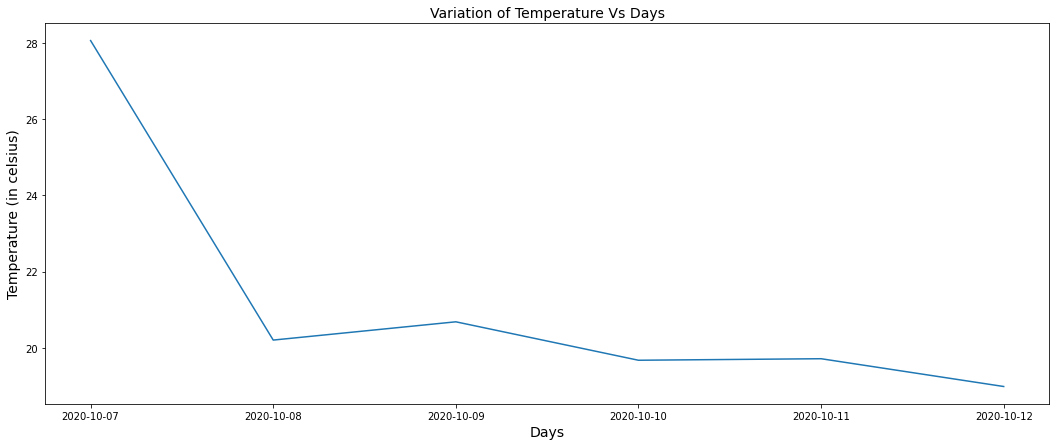

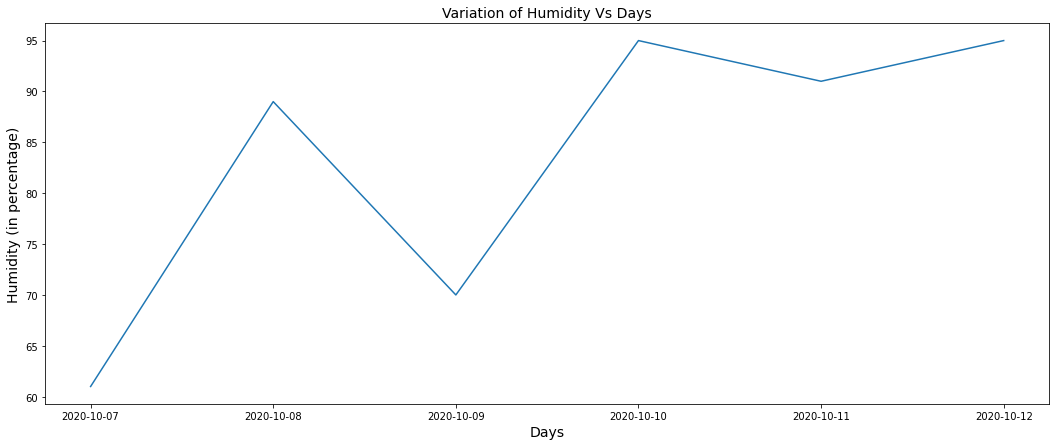

In [61]:
if __name__ == "__main__":
    OpenWeatherForecast(city = "bangalore").show_variation()